In [1]:
import numpy as np
import pandas as pd
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

считаем сигналы и чеклисты на наличие сигнала

In [16]:
input = open("obnarujitel.txt", "r")
i = 0;
data=[]
check=[]
datafull=[]

In [17]:
data1=[]
for line in input:
    if i==0:
        data1 = [mt.fabs(float(x)) for x in line.split()]
        data2 = []
        for t in [i1 for i1 in range(10)]:
            data3 = []
            for t1 in [i2 for i2 in range(10)]:
                data3.append(np.sum(data1[t*100+t1*10:t*100+(t1+1)*10])/10.0)
            data2.append(data3)
        data.append(data2)
        datafull.append([float(x) for x in line.split()])
        i=1;
    else:
        check.append([float(x) for x in line.split()])
        i=0;

i1 номер сигнала который будем рассматривать

In [18]:
i1 = 23

In [19]:
check[i1]

[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]

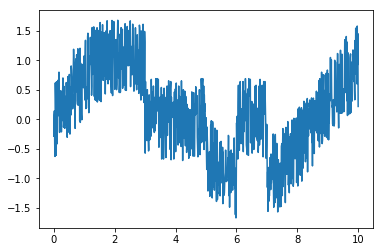

In [20]:
x = np.linspace(0, 10, 1000)
y = datafull[i1]
plt.plot(x, y)

In [21]:
data[0]

[[0.28844606,
  0.4116736900000001,
  0.418711262,
  0.3730564,
  0.5625312,
  0.34625691999999997,
  0.5321874799999999,
  0.5549934000000001,
  0.50138017,
  0.6143004999999999],
 [0.7946582,
  0.8571270000000002,
  0.8476496999999998,
  0.9434454999999999,
  1.0142590999999999,
  1.0173607999999998,
  1.2437954999999998,
  0.9308917000000001,
  1.1697562,
  0.9940230999999999],
 [0.34625000000000006,
  0.3125,
  0.35124999999999995,
  0.26,
  0.38125,
  0.33375,
  0.27625,
  0.2824999999999999,
  0.32625000000000004,
  0.33875],
 [0.8503675000000002,
  0.8357837,
  0.5729458000000001,
  0.7784046,
  0.34748207,
  0.70802197,
  0.7116361,
  0.6724296900000001,
  0.5077358500000001,
  0.35967864],
 [0.40875000000000006,
  0.31625000000000003,
  0.39375,
  0.21999999999999997,
  0.3275,
  0.37,
  0.31875000000000003,
  0.46375,
  0.35875,
  0.4149999999999999],
 [0.24000000000000005,
  0.34374999999999994,
  0.42750000000000005,
  0.29999999999999993,
  0.37625,
  0.2725,
  0.4025,
  0

In [22]:
w = np.linalg.solve(data[3], check[3])

In [403]:
w

array([ -0.53946628, -11.50184406,   1.24683561,   2.91533733,
         5.26868677,   8.08285109, -15.32640629,   7.65790741,
         5.5303488 ,  -4.56418359])

In [404]:
check[3]

[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [24]:
datanp = np.array(data)
checknp = np.array(check)

In [25]:
datanp[3].dot(w)

array([ 4.44089210e-16,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -1.33226763e-15, -8.88178420e-16, -4.44089210e-16,
       -4.44089210e-16, -8.88178420e-16])

In [26]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [27]:
def check_error(w1):
    sum = 0
    for i in [i1 for i1 in range(1000)]:
        ch1 = datanp[i]*w1
        sum = sum + dist(ch1, check[i])
    return sum

In [28]:
res = minimize(check_error, w,  method='powell',
    options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 5361.848368
         Iterations: 2
         Function evaluations: 305


In [29]:
w11=res.x

In [30]:
w11

array([0.75379149, 0.79133964, 0.79446518, 0.77972442, 0.78060216,
       0.78726437, 0.7637294 , 0.76488398, 0.73461515, 0.78072732])

In [33]:
datanp[105].dot(w11)

array([3.13017934, 2.72980318, 8.42726856, 2.59098957, 2.75986709,
       3.67216587, 2.79916333, 2.62880419, 8.54516503, 3.10388469])

In [34]:
check[105]

[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]

Найдем максмальное число при отсутствие сигнала

In [35]:
input = open("testnull.txt", "r")
i = 0;
data=[]
check=[]
datafull=[]

In [36]:
data1=[]
for line in input:
    data1 = [mt.fabs(float(x)) for x in line.split()]
    data2 = []
    for t in [i1 for i1 in range(10)]:
        data3 = []
        for t1 in [i2 for i2 in range(10)]:
            data3.append(np.sum(data1[t*100+t1*10:t*100+(t1+1)*10])/10.0)
        data2.append(data3)
    data.append(data2)
    datafull.append(data1)

In [38]:
datanp=np.array(data)
max = 0;

In [39]:
for el in datanp:
    for n in el.dot(w11):
        if n>max:
            max=n

In [40]:
max

3.375957995374002

Найдем минимальное значения для ситуации при присутствие сигнала

In [41]:
input = open("testnotnull.txt", "r")
i = 0;
data=[]
check=[]
datafull=[]

In [42]:
data1=[]
for line in input:
    data1 = [mt.fabs(float(x)) for x in line.split()]
    data2 = []
    for t in [i1 for i1 in range(10)]:
        data3 = []
        for t1 in [i2 for i2 in range(10)]:
            data3.append(np.sum(data1[t*100+t1*10:t*100+(t1+1)*10])/10.0)
        data2.append(data3)
    data.append(data2)
    datafull.append(data1)

In [43]:
datanp=np.array(data)
min = 10;

In [44]:
for el in datanp:
    for n in el.dot(w11):
        if n<min:
            min=n

In [45]:
min

2.33844083619058

Как мы видим ошибка все таки имеет место мыть, на отрезке (2.3; 3.4) примем за границу 3

In [47]:
input = open("test.txt", "r")
i = 0;
data=[]
check=[]
datafull=[]

In [48]:
data1=[]
for line in input:
    if i==0:
        data1 = [mt.fabs(float(x)) for x in line.split()]
        data2 = []
        for t in [i1 for i1 in range(10)]:
            data3 = []
            for t1 in [i2 for i2 in range(10)]:
                data3.append(np.sum(data1[t*100+t1*10:t*100+(t1+1)*10])/10.0)
            data2.append(data3)
        data.append(data2)
        datafull.append(data1)
        i=1;
    else:
        check.append([float(x) for x in line.split()])
        i=0;

In [49]:
datanp = np.array(data)
checknp = np.array(check)

In [53]:
i=0
check_sign=0
res_sign=0
errors=0
full_errors=0;
for el in datanp:
    res = []
    check_sign=0
    res_sign=0
    res_ = el.dot(w11)
    for i2 in [i1 for i1 in range(10)]:
        if check[i][i2]==1:
            check_sign=1
        if res_[i2]>3:
            res.append(1)
            res_sign=1
        else:
            res.append(0)
    for i2 in [i1 for i1 in range(10)]:
        if res[i2]==check[i][i2]:
            print("ok")
        else:
            print("false " + str(res[i2]) + "!=" + str(check[i][i2]))
            errors=errors+1
    if(res_sign==check_sign):
        if(res_sign==1):
            print("succesefull sign detected")
        else:
            print("succesefull sign not detected")
    else:
        full_errors=full_errors+1
        if(res_sign==1):
            print("unsuccesefull sign detected")
        else:
            print("unsuccesefull sign not detected")
    print(res)
    i=i+1

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
false 0!=1.0
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1]
ok
ok
false 1!=0.0
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 0, 1

ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
succesefull sign detected
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0]
ok
ok
ok
ok
false 1!=0.0
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 0, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 0, 0, 1, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
ok
false 1!=0.0
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
succesefull sign detected
[0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
false 0!=1.0
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign det

succesefull sign detected
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 1, 0, 0, 1, 1, 1, 0]
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 1, 1, 0, 1, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 1, 0, 1, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[1, 1, 1, 1, 0, 0, 1, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
false 

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[1, 1, 0, 0, 0, 0, 1, 1, 0, 0]
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
false 0!=1.0
ok
succesefull sign detected
[0, 1, 1, 0, 0, 0, 1, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[0, 0, 1, 0, 1, 1, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 0, 0, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[1, 

ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 1, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
succesefull sign detected
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
succesefull sign detected
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
succesefull sign detected
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
ok
ok
ok
ok
ok


ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
succesefull sign detected
[0, 1, 0, 1, 0, 1, 1, 1, 1, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
false 0!=1.0
ok
succesefull sign detected
[1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[1, 1, 1, 0, 0, 1, 0, 0, 0, 1]
false 0!=1.0
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 1, 1, 1, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 

[0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
succesefull sign detected
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 1, 1, 0, 1, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
false 1!=0.0
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
succesefull sign detected
[0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
false 0!=1.0
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
ok
false 1!=0.0
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
false 0!=1.0
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 1, 0, 0, 1, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
false 1!=0.0
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 1, 1, 1, 1, 1,

In [54]:
errors

568

568 ошибок из 10000 сегментов


In [55]:
full_errors

0